# TF Logistic From scratch

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import itertools
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
mnist = fetch_mldata("MNIST original", data_home="/home/saurabh/Documents/python/digits/data")

X_train, X_test, y_train, y_test = train_test_split(mnist.data, label_binarize(mnist.target, classes = range(10)))

In [3]:
print ('Shape of X : {}'.format(X_train.shape))
print ('Shape of y : {}'.format(y_train.shape))

Shape of X : (52500, 784)
Shape of y : (52500, 10)


In [3]:
X_train[0].tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 37,
 254,
 70,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 67,
 96,
 177,
 217,
 215,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 48,
 100,
 182,
 210,
 254,
 253,
 253,
 253,
 244,
 175,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 86,
 248,
 253,
 253,
 253,
 252,
 231,
 231,
 231,
 236,
 250,
 136,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 137,
 253,


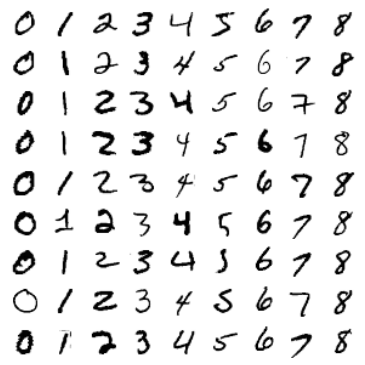

In [8]:
fig = plt.figure(figsize=(7, 7))
for x in range(0, 9):
    for y in range(0, 9):
        ax = fig.add_subplot(10, 10, 10*(y+1)+x + 1)
        index = np.where(mnist.target == x)[0][y]
        ax.imshow(mnist.data[index].reshape((28, 28)), cmap = "Greys")
        ax.axis("off")
        plt.xticks([])
        plt.yticks([])

In [5]:
indices = np.random.randint(X_train.shape[0], size=10)
X_train[indices].shape
y_train[indices].shape

(10, 10)

| s_no |       time |       cost |  train_accuracy |     cv_accuracy |
|----- | ---------- | ---------- | --------------- | --------------- |
|    1 | 0.0308 min |     979.84 |          60.0 % |          66.0 % | 
|    2 | 0.0295 min |     959.99 |          60.0 % |          65.0 % | 
|    3 |  0.043 min |     956.61 |          59.0 % |          61.0 % | 
|    4 |  0.037 min |     952.57 |          62.0 % |          65.0 % | 
|    5 | 0.0312 min |     951.71 |          55.0 % |          71.0 % | 
|    6 | 0.0355 min |     948.86 |          64.0 % |          61.0 % | 
|    7 | 0.0338 min |     949.67 |          62.0 % |          64.0 % | 
|    8 | 0.0394 min |     948.63 |          72.0 % |          72.0 % | 
|    9 | 0.0505 min |     948.63 |          63.0 % |          65.0 % | 
|   10 | 0.0524 min |     948.46 |          67.0 % |          61.0 % | 
|   11 | 0.0563 min |     947.83 |          69.0 % |          62.0 % | 
|   12 | 0.0318 min |     947.61 |          63.0 % |          55.0

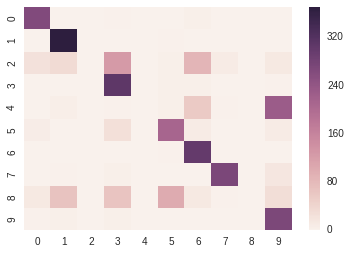

In [5]:
from __future__ import division

np.random.seed(1)
n_epochs = 30
batch_size = 100

graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, [None, 784])


    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.nn.softmax(tf.matmul(X, W) + b)

    y_ = tf.placeholder(tf.float32, [None, 10])


    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
    train_step = tf.train.GradientDescentOptimizer(.01).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()


train = []
cv = []
cost = []

with tf.Session(graph=graph) as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    headers = ["s_no", "time", "cost", "train_accuracy", "cv_accuracy"]
    print "|{0:>5} | {1:>10} | {2:>10} | {3:>15} | {4:>15} |".format(*headers)
    print "|{0:-<5} | {0:-<10} | {0:-<10} | {0:-<15} | {0:-<15} |".format("")
    
    n_steps = int (X_train.shape[0] / batch_size)
    for epoch in range(n_epochs):
        start_time = datetime.now()
        avg_cost = 0
        for _ in range(n_steps):
            indices = np.random.randint(X_train.shape[0], size=batch_size)
            sess.run(train_step, { X: X_train[indices], y_: y_train[indices]})
            avg_cost += sess.run(cross_entropy, { X: X_train[indices], y_: y_train[indices]})
        end_time = datetime.now()
        indices = np.random.randint(X_train.shape[0], size=batch_size)
        score_train = accuracy.eval({ X: X_train[indices], y_: y_train[indices] })
        
        indices = np.random.randint(X_train.shape[0], size=batch_size)
        score_valid = accuracy.eval({ X: X_train[indices], y_: y_train[indices] })
        
        print ("|{0:>5} | {1:>6.3} min | {2:>10.2f} | {3:>13.1f} % | {4:>13.1f} % | ".format(
                 epoch + 1, (end_time - start_time).total_seconds() / 60.0, avg_cost, 100 * score_train, 100 * score_valid))
        train.append(score_train * 100)
        cv.append(score_valid * 100)
        cost.append(avg_cost)
    indices = np.random.randint(X_test.shape[0], size=3000)
    y_true = np.argmax(y_test[indices], 1)
    y_pred = np.argmax(y.eval({ X: X_test[indices] }), 1)
    
    sns.heatmap(confusion_matrix(y_true, y_pred))
    print "{0:>.1f} %".format(accuracy_score(y_true, y_pred) * 100)
    
    save_path = saver.save(sess, "saved_models/mnist/LOGISTIC_MODEL.ckpt")

In [8]:
with tf.Session(graph=graph) as sess:
    tf.train.write_graph(sess.graph_def, "saved_graphs/mnist", "logistic.pb")

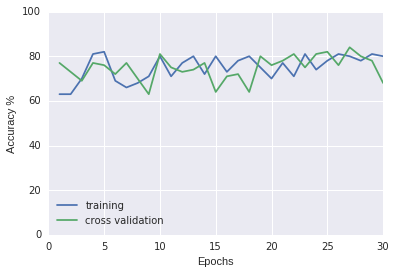

In [61]:
points = {
    "epoch": range(1, len(train) + 1),
    "train": train,
    "cv":    cv
}
plt.plot(points["epoch"], points["train"])
plt.plot(points["epoch"], points["cv"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.ylim((0, 100))
plt.legend(["training", "cross validation"], loc="lower left");

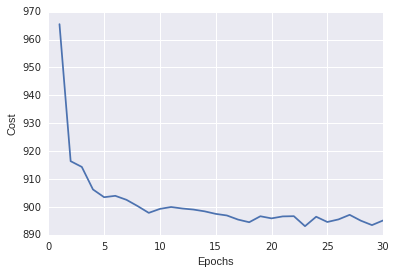

In [63]:
points = {
    "epoch": range(1, len(train) + 1),
    "cost": cost
}

plt.plot(points["epoch"], points["cost"])
plt.xlabel("Epochs")
plt.ylabel("Cost")

## Running the same data with `sklearn`'s LogisticRegression.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(verbose = 1,  solver = "sag", n_jobs = -2))
clf.fit(X_train, y_train)

max_iter reached after 52 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   52.0s finished


max_iter reached after 52 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   52.1s finished


max_iter reached after 51 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   51.2s finished


max_iter reached after 51 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   50.7s finished


max_iter reached after 51 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   51.6s finished


max_iter reached after 53 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   52.3s finished


max_iter reached after 52 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   52.5s finished


max_iter reached after 52 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   52.6s finished


max_iter reached after 52 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   52.8s finished


max_iter reached after 52 seconds


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:   52.4s finished


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-2,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=1, warm_start=False),
          n_jobs=1)

In [18]:
print ("Accuracy: {0:0.1f} %".format(clf.score(X_test, y_test) * 100))

Accuracy: 81.9 %
